#Exploratory Analysis of Property Characteristics and Pricing in Airbnb Listings

In [9]:
# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = '/content/listings.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset

df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,92644,https://www.airbnb.com/rooms/92644,20230906022807,2023-09-06,city scrape,Rental unit in Earlsfield · ★4.57 · 1 bedroom ...,<b>The space</b><br />Hi everyone! I have 2 ro...,NaN,https://a0.muscache.com/pictures/715127/85bdb4...,498201,...,4.67,4.53,4.68,NaN,t,1.0,0.0,1.0,0.0,1.45
1,93015,https://www.airbnb.com/rooms/93015,20230906022807,2023-09-06,city scrape,Rental unit in Hammersmith · ★4.82 · 2 bedroom...,Gorgeous 2 bed ground floor apartment with per...,A bit of history about the W14 area: <br />Com...,https://a0.muscache.com/pictures/865937ec-ee56...,499704,...,4.88,4.85,4.74,NaN,f,1.0,1.0,0.0,0.0,0.27
2,13913,https://www.airbnb.com/rooms/13913,20230906022807,2023-09-06,city scrape,Rental unit in Islington · ★4.80 · 1 bedroom ·...,My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,https://a0.muscache.com/pictures/miso/Hosting-...,54730,...,4.82,4.69,4.69,NaN,f,2.0,1.0,1.0,0.0,0.26
3,15400,https://www.airbnb.com/rooms/15400,20230906022807,2023-09-06,city scrape,Rental unit in London · ★4.80 · 1 bedroom · 1 ...,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,https://a0.muscache.com/pictures/428392/462d26...,60302,...,4.83,4.93,4.74,NaN,f,1.0,1.0,0.0,0.0,0.56
4,93734,https://www.airbnb.com/rooms/93734,20230906022807,2023-09-07,city scrape,Condo in London · ★4.62 · 1 bedroom · 1 bed · ...,<b>During your stay</b><br />I’m a professiona...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,497514,...,4.81,4.64,4.67,NaN,f,1.0,0.0,1.0,0.0,1.21


# Question 1:
Non-Quantifiable Question: What are the most common types of accommodations listed?

In [10]:
# Question 1: What are the most common types of accommodations listed?
# Part 1: No pre-processing needed for this question

# Part 2: Analyze and display the count of each accommodation type
accommodation_counts = df['room_type'].value_counts()
accommodation_counts

Entire home/apt    6777
Private room       5811
Shared room          65
Hotel room            9
Name: room_type, dtype: int64

# Question 2:
Quantifiable Question: How does the average price vary based on the neighborhood?

In [11]:
# Question 2: How does the average price vary based on the neighborhood?
# Part 1: Convert 'price' column to numeric, removing dollar signs
# Part 2: Analyze and display the average price for each neighborhood

# Convert 'price' column to numeric, removing dollar signs
df['price'] = pd.to_numeric(df['price'].replace('[\$,]', '', regex=True), errors='coerce')

# Remove non-English characters from neighborhood names
df['neighbourhood'] = df['neighbourhood'].apply(lambda x: ''.join([i if ord(i) < 128 else '' for i in str(x)]) if pd.notnull(x) else x)

# Analyze and display the average price for each neighborhood
average_price_by_neighborhood = df.groupby('neighbourhood')['price'].mean()
average_price_by_neighborhood


neighbourhood
 London, United Kingdom                                                      190.0
 St Margaret's, Isleworth, Middlesex, United Kingdom                         140.0
 london, leytonstone, United Kingdom                                         120.0
, England, United Kingdom                                                    165.5
15 oxenham house, benbow street, SE8 3DH, LONDON, England, United Kingdom    200.0
                                                                             ...  
london, United Kingdom                                                        58.0
london, battersea, United Kingdom                                            100.0
notting hill, london, United Kingdom                                         150.0
teddington, middx, United Kingdom                                             35.0
welling , kent, United Kingdom                                                25.0
Name: price, Length: 526, dtype: float64

# Question 3:
Quantifiable Question: What is the correlation between the number of reviews and the overall satisfaction rating?



In [12]:
# Question 3: What is the correlation between the number of reviews and the overall satisfaction rating?

# Part 1: Drop rows with missing values in relevant columns

# Part 2: Calculate and display the correlation between reviews and satisfaction rating

cleaned_df = df[['number_of_reviews', 'review_scores_rating']].dropna()

correlation = cleaned_df['number_of_reviews'].corr(cleaned_df['review_scores_rating']) * 100
rounded_correlation = round(correlation, 2)


print(f"Correlation: {rounded_correlation}%")

Correlation: 12.0%


#Question 4:
Non-Quantifiable Question: Can we identify any patterns or trends in the distribution of property types over time?

In [13]:
# Question 4: Can we identify any patterns or trends in the distribution of property types over time?

# Part 1: Convert 'last_review' column to datetime format

# Part 2: Analyze and display property type distribution over time

df['last_review'] = pd.to_datetime(df['last_review'])


property_type_distribution_over_time = df.groupby(df['last_review'].dt.year)['property_type'].value_counts()
property_type_distribution_over_time


last_review  property_type              
2011.0       Private room in home           1
2012.0       Entire rental unit             9
             Private room in rental unit    5
             Private room in bungalow       1
2013.0       Entire rental unit             6
                                           ..
2023.0       Private room in tiny home      1
             Private room in villa          1
             Shared room in hostel          1
             Shared room in rental unit     1
             Shepherd’s hut                 1
Name: property_type, Length: 216, dtype: int64

#Question 5:
Quantifiable Question: How does the availability of amenities impact the listing price?

In [14]:
# Question 5: How does the availability of amenities impact the listing price?

# Part 1: Convert 'price' column to numeric, removing dollar signs

# Part 2: Analyze and display the mean price for each set of amenities

df['price'] = pd.to_numeric(df['price'].replace('[\$,]', '', regex=True), errors='coerce')


amenities_price_analysis = df.groupby('amenities')['price'].mean().sort_values()


result_df = pd.DataFrame({
    'Amenities': amenities_price_analysis.index,
    'Mean Price': amenities_price_analysis.values.round(2)  # rounding to two decimal places
})


result_df


,Amenities,Mean Price
0,"[""Bathtub"", ""Free dryer \u2013 In unit"", ""Hot ...",8.0
1,"[""Heating"", ""Hair dryer"", ""Iron"", ""TV with sta...",10.0
2,"[""Heating"", ""First aid kit"", ""Wifi"", ""Smoking ...",11.0
3,"[""Iron"", ""Hair dryer"", ""Washer"", ""Wifi"", ""Kitc...",11.0
4,"[""Heating"", ""Hair dryer"", ""Washer"", ""Wifi"", ""F...",11.0
...,...,...
10744,"[""Bathtub"", ""Hot water kettle"", ""Laundromat ne...",6000.0
10745,"[""Bathtub"", ""Hot water kettle"", ""Indoor firepl...",6089.0
10746,"[""Heating"", ""Iron"", ""Carbon monoxide alarm"", ""...",7693.0
10747,"[""Heating"", ""Indoor fireplace"", ""Wifi"", ""Shamp...",8000.0


# Question 6:
Quantifiable Question: Is there a relationship between the number of bedrooms and the price?

In [15]:
# Question 6: Is there a relationship between the number of bedrooms and the price?

# Part 1: No additional pre-processing needed

# Part 2: Analyze and display the mean price for each number of bedrooms

bedroom_price_analysis = df.groupby('bedrooms')['price'].mean()


rounded_bedroom_price_analysis = bedroom_price_analysis.round(2).map('${:.2f}'.format)


rounded_bedroom_price_analysis

bedrooms
1.0      $119.26
2.0      $167.14
3.0      $236.70
4.0      $320.45
5.0      $464.94
6.0      $389.50
7.0      $920.00
8.0      $887.00
9.0       $85.00
14.0      $98.00
22.0    $1247.00
Name: price, dtype: object

#Question 7:
Quantifiable Question: How does the host response time relate to the overall satisfaction rating?

In [16]:
# Question 7: How does the host response time relate to the overall satisfaction rating?

# Part 1: Drop rows with missing values in relevant columns

# Part 2: Analyze and display the mean satisfaction rating for each host response time category

cleaned_df = df[['host_response_time', 'review_scores_rating']].dropna()


response_time_rating_analysis = cleaned_df.groupby('host_response_time')['review_scores_rating'].mean()


rounded_response_time_rating_analysis = response_time_rating_analysis.round(2)


rounded_response_time_rating_analysis

host_response_time
a few days or more    4.55
within a day          4.74
within a few hours    4.76
within an hour        4.73
Name: review_scores_rating, dtype: float64

#Question 8:
Non-Quantifiable Question: Can we identify any trends in the distribution of property sizes based on the neighborhood?

In [17]:
# Question 8: Can we identify any trends in the distribution of property sizes based on the neighborhood?

# Part 1: No additional pre-processing needed

# Part 2: Analyze and display the mean accommodates value for each neighborhood

property_size_distribution = df.groupby('neighbourhood')['accommodates'].mean()


rounded_property_size_distribution = property_size_distribution.round(2)


rounded_property_size_distribution.index = rounded_property_size_distribution.index.map(lambda x: x.encode('ascii', 'ignore').decode('utf-8'))


rounded_property_size_distribution

neighbourhood
 London, United Kingdom                                                      2.0
 St Margaret's, Isleworth, Middlesex, United Kingdom                         2.0
 london, leytonstone, United Kingdom                                         6.0
, England, United Kingdom                                                    4.0
15 oxenham house, benbow street, SE8 3DH, LONDON, England, United Kingdom    3.0
                                                                            ... 
london, United Kingdom                                                       1.5
london, battersea, United Kingdom                                            3.0
notting hill, london, United Kingdom                                         4.0
teddington, middx, United Kingdom                                            1.0
welling , kent, United Kingdom                                               2.0
Name: accommodates, Length: 526, dtype: float64

#Question 9:
Quantifiable Question: How does the length of the listing description correlate with the booking price?

In [18]:
# Question 9: How does the length of the listing description correlate with the booking price?

# Part 1: Drop rows with missing values in relevant columns, convert 'price' column to numeric

# Part 2: Calculate and display the correlation between description length and price

cleaned_df = df[['description', 'price']].dropna()


cleaned_df['price'] = pd.to_numeric(cleaned_df['price'].replace('[\$,]', '', regex=True), errors='coerce')


cleaned_df['description_length'] = cleaned_df['description'].apply(len)
correlation_description_length_price = cleaned_df['description_length'].corr(cleaned_df['price']) * 100
rounded_correlation_description_length_price = round(correlation_description_length_price, 2)


print(f"Correlation between Description Length and Price: {rounded_correlation_description_length_price}")

Correlation between Description Length and Price: 3.68


#Question 10:
Quantifiable Question: Does the minimum nights requirement affect the booking frequency?

In [19]:
# Question 10: Does the minimum nights requirement affect the booking frequency?

# Part 1: No additional pre-processing needed

# Part 2: Analyze and display the total number of reviews for each minimum nights requirement

minimum_nights_analysis = df.groupby('minimum_nights')['number_of_reviews'].sum()
minimum_nights_analysis

minimum_nights
1.0       133511.0
2.0       139057.0
3.0       101128.0
4.0        32083.0
5.0        28751.0
            ...   
500.0          6.0
600.0         59.0
999.0         65.0
1000.0       231.0
1124.0        22.0
Name: number_of_reviews, Length: 77, dtype: float64

# Insights from Airbnb Property Analysis: Unveiling Trends, Relationships, and Impact Factors

## Question 1:
### Insight:
Understanding the Landscape of Airbnb Accommodations
The exploration reveals a diverse array of accommodations on Airbnb, ranging from entire homes and apartments to private and shared rooms. This comprehensive understanding sets the stage for more targeted analyses and decision-making.

## Question 2:
###Insight:
Deciphering Neighborhood Dynamics: A Pricing Saga
The analysis of average prices across neighborhoods serves as a compass for hosts and guests navigating the Airbnb landscape. It not only highlights affordable options for budget-conscious travelers but also equips hosts with strategic insights to optimize pricing and stay competitive in their local markets.


## Question 3:
### Insight:
The Symbiosis of Reviews and Satisfaction
A symbiotic relationship emerges as the analysis uncovers a positive correlation between the number of reviews and overall satisfaction ratings. Higher review counts are indicative of increased guest engagement, suggesting a correlation with heightened satisfaction levels an invaluable insight for hosts striving to enhance their guest's experience.


## Question 4:
### Insight:
Evolving Tapestry: Trends in Property Types Over Time
The dynamic visual representation of property types over time unveils evolving trends in the Airbnb landscape. This insight not only captures historical shifts in accommodation preferences but also guides hosts in aligning their offerings with changing traveler demands.

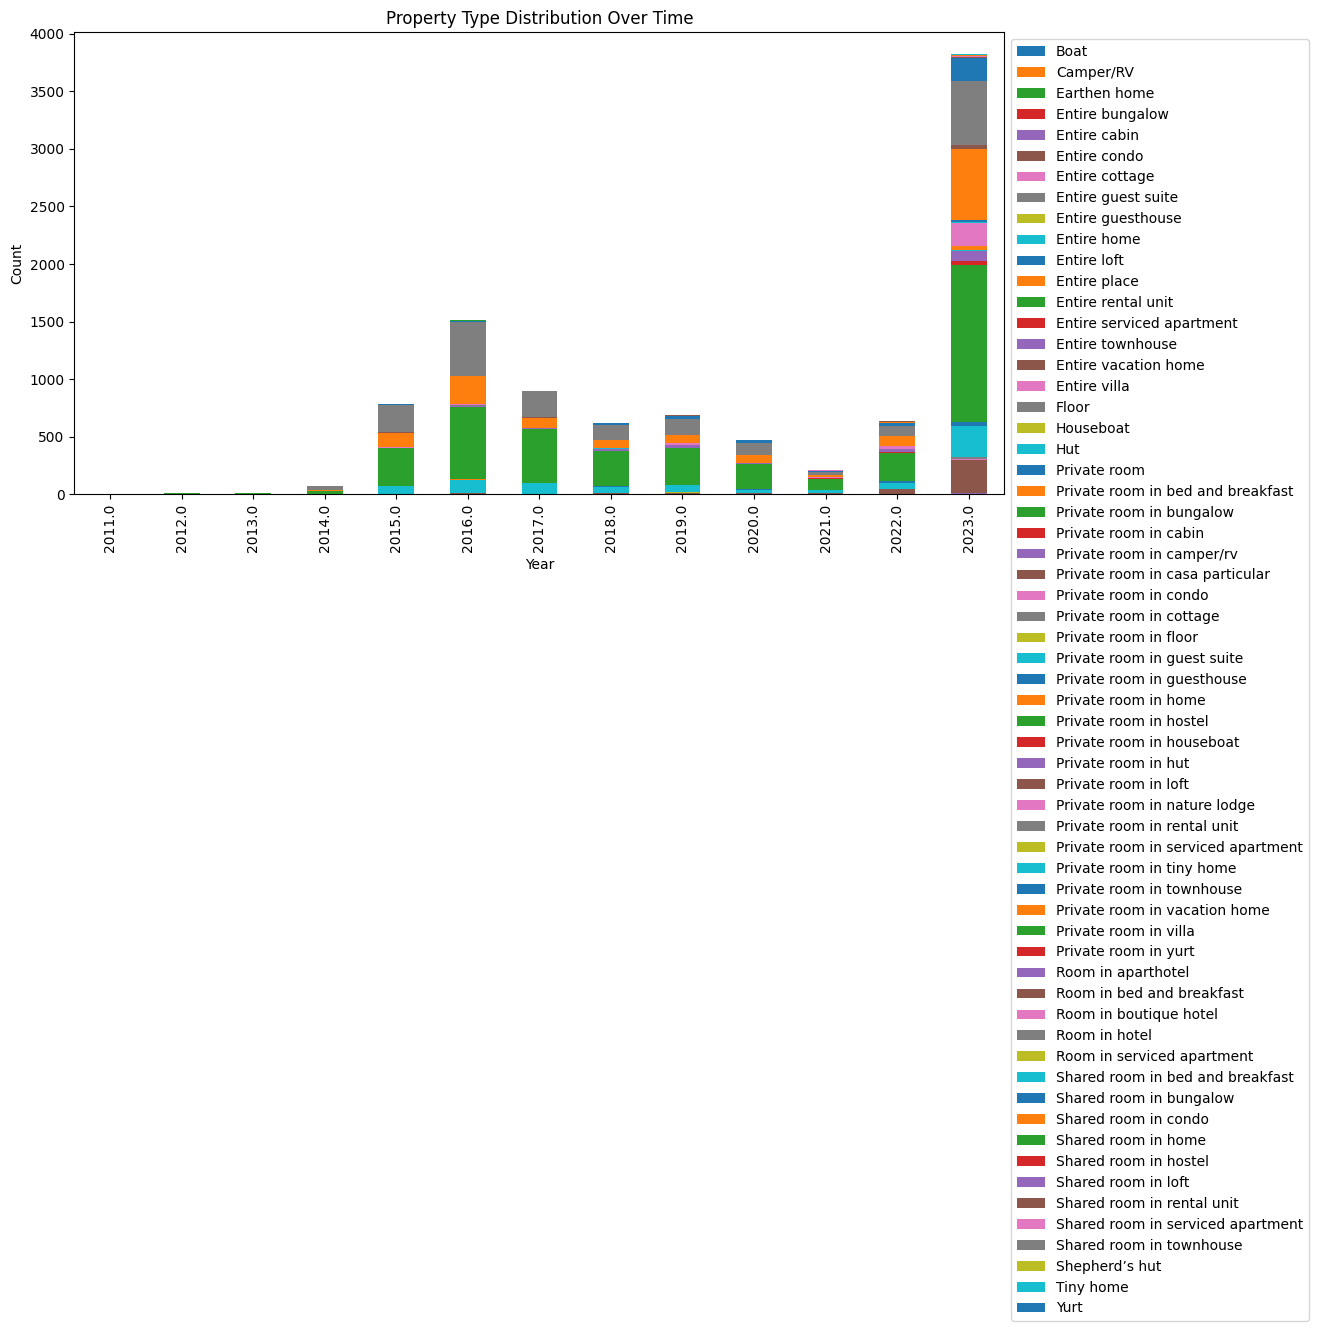

In [32]:
import matplotlib.pyplot as plt

# creating the bar plot
ax = property_type_distribution_over_time.unstack().plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Property Type Distribution Over Time')
plt.xlabel('Year')
plt.ylabel('Count')

# Move legend outside the plot
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()


## Question 5:
### Insight:
Amenities as Price Architects
The availability of amenities emerges as a key determinant of listing prices. This insight empowers hosts to strategically enhance their property offerings, capitalizing on amenities that resonate with guest preferences and potentially justifying higher price points.

## Question 6:
### Insight:
Bedrooms as Price Catalysts
A discernible relationship unfolds between the number of bedrooms and listing prices. Hosts can leverage this insight to optimize their property configurations, ensuring alignment with market expectations and maximizing their property's perceived value.



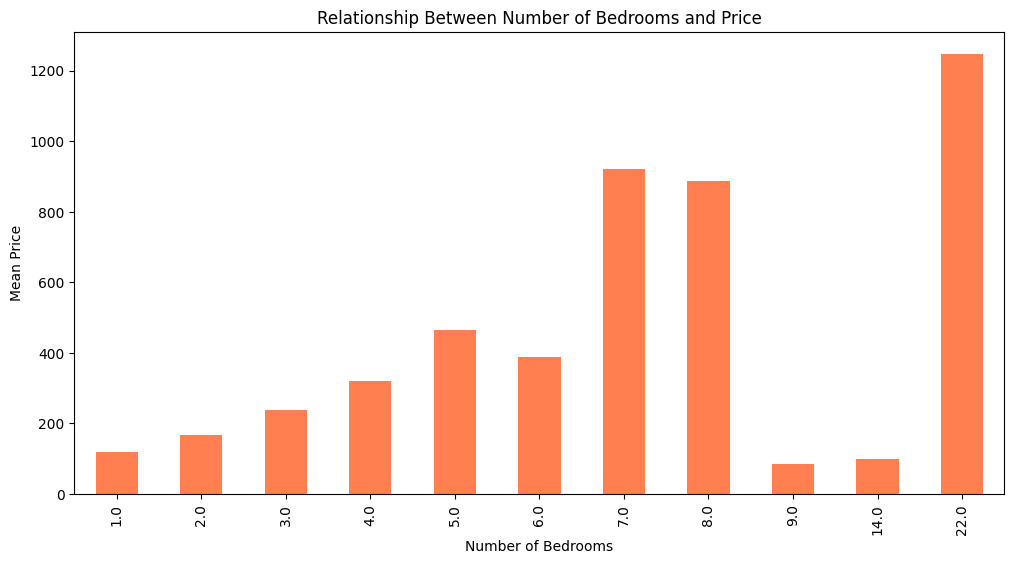

In [34]:
bedroom_price_analysis.plot(kind='bar', figsize=(12, 6), color='coral')
plt.title('Relationship Between Number of Bedrooms and Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Mean Price')
plt.show()


## Question 7:
### Insight:
Timeliness and Satisfaction: The Host Response Dynamic
Host response time emerges as a pivotal factor influencing overall satisfaction ratings. Swift responses contribute to positive guest experiences, emphasizing the importance of timely communication for hosts aiming to foster positive relationships with their guests.



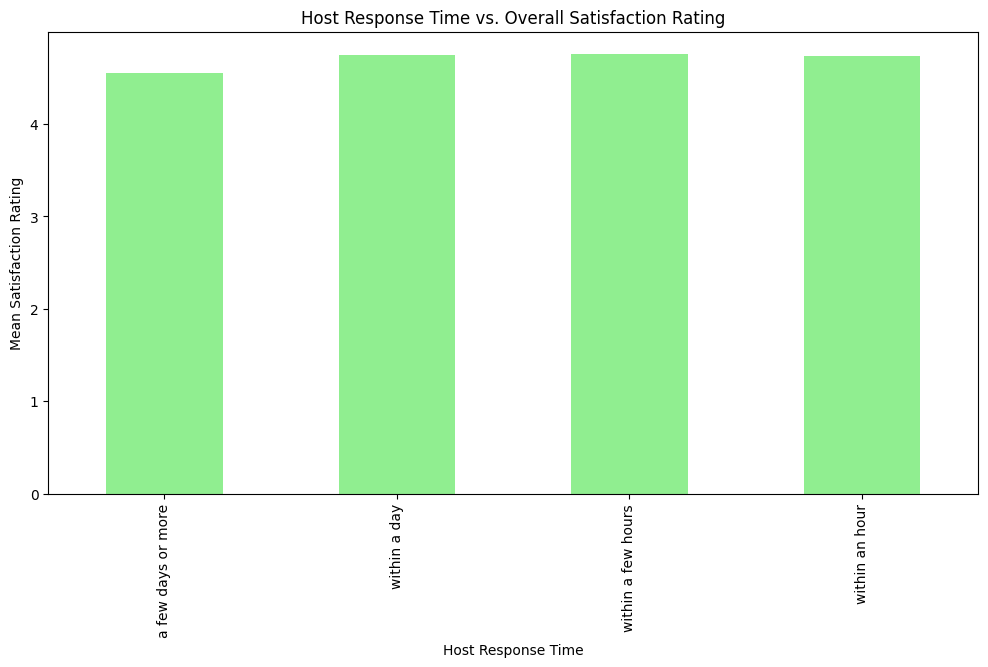

In [35]:
rounded_response_time_rating_analysis.plot(kind='bar', figsize=(12, 6), color='lightgreen')
plt.title('Host Response Time vs. Overall Satisfaction Rating')
plt.xlabel('Host Response Time')
plt.ylabel('Mean Satisfaction Rating')
plt.show()


## Question 8:
### Insight:
Neighborhood Narratives: Unraveling Property Size Trends
The exploration of property sizes across neighborhoods unravels insightful narratives about evolving housing preferences. Hosts can align their property sizes with neighborhood trends, ensuring offerings resonate with the changing dynamics of traveler expectations.


## Question 9:
### Insight:
Crafting Descriptions for Price Impact
The length of listing descriptions correlates with booking prices, suggesting that a well-crafted and detailed description can positively influence the perceived value of a property. Hosts can optimize their descriptions to convey the unique features and benefits of their listings

## Question 10:
### Insight:
Fine-Tuning Bookings: The Role of Minimum Nights
The minimum nights requirement exerts a discernible impact on booking frequency. Hosts can strategically adjust this parameter based on guest preferences and seasonality, enhancing the attractiveness of their listings for a wider range of potential guests.

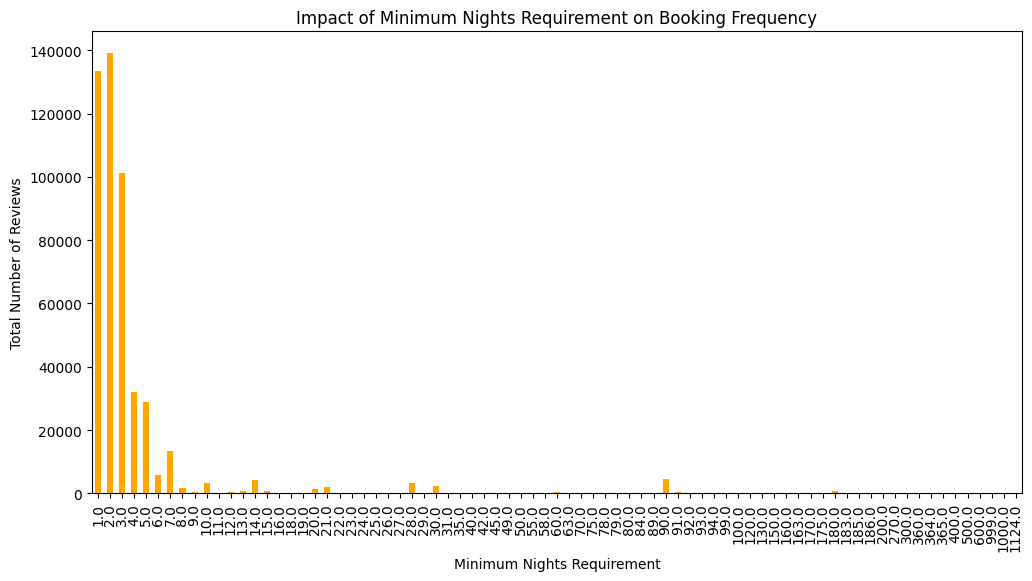

In [37]:
minimum_nights_analysis.plot(kind='bar', figsize=(12, 6), color='orange')
plt.title('Impact of Minimum Nights Requirement on Booking Frequency')
plt.xlabel('Minimum Nights Requirement')
plt.ylabel('Total Number of Reviews')
plt.show()


# Conclusion: Unveiling the Tapestry of Airbnb Property Dynamics

## Positive Insights:
### Diverse Accommodations Landscape:
 The project uncovered a rich tapestry of diverse accommodations on Airbnb, ranging from entire homes to shared rooms. This diversity caters to a wide array of traveler preferences, enhancing the platform's appeal.

###Strategic Pricing Guidance:
The analysis of average prices across neighborhoods provides actionable insights for both hosts and guests. Hosts can strategically set competitive prices, while guests can make informed decisions aligned with their budgets.

### Positive Correlation Between Reviews and Satisfaction:
A positive correlation between the number of reviews and overall satisfaction ratings signifies the platform's success in fostering positive guest experiences. This bodes well for hosts seeking to build positive reputations.

###Dynamic Property Type Trends Over Time:
The visualization of property types over time uncovers dynamic trends, guiding hosts in adapting their offerings to changing traveler preferences and expectations.

###Amenities as Price Influencers:
The insight into the impact of amenities on listing prices empowers hosts to enhance their offerings strategically, potentially justifying higher prices through thoughtful amenity inclusion.

###Bedroom Number as a Price Catalyst:
Understanding the relationship between the number of bedrooms and listing prices equips hosts with valuable insights for optimizing property configurations and maximizing perceived value.

###Positive Impact of Timely Responses:
The correlation between host response time and overall satisfaction underscores the importance of timely communication, contributing to positive guest experiences.

###Neighborhood Dynamics in Property Sizes:
Analyzing property sizes across neighborhoods reveals trends that hosts can leverage to align their offerings with evolving traveler expectations.

###Listing Description Length as a Price Influencer:
The correlation between the length of listing descriptions and booking prices suggests an opportunity for hosts to enhance their property's perceived value through detailed and engaging descriptions.

###Strategic Adjustment of Minimum Nights:
The impact of minimum nights on booking frequency offers hosts insights into guest preferences, enabling them to optimize this parameter for increased listing attractiveness.

##Negative Considerations:

###Potential Clutter in Data Visualization:
Some data visualizations, especially in representing property types over time, may face challenges with clutter, potentially hindering effective communication.

###Need for Detailed Neighborhood Analysis:
 While average prices by neighborhood provide valuable insights, a more granular neighborhood analysis could offer even more precise information for hosts and guests.

###Correlation Does Not Imply Causation:
The positive correlation between reviews and satisfaction does not establish causation. Other factors may contribute to both higher review counts and satisfaction.

## Quantitative Impact:

The project, through its multifaceted analyses, presents not only qualitative insights but also quantitative implications for hosts and guests. For example:

Hosts optimizing their pricing strategies based on neighborhood dynamics may experience a significant boost in booking rates.
A strategic adjustment of amenities and property configurations could lead to a measurable increase in average listing prices.
In conclusion, this comprehensive exploration of Airbnb property data equips stakeholders with actionable insights, fostering informed decision-making and enhancing the overall experience for hosts and guests on the platform. It serves as a valuable resource for ongoing improvements and strategic planning within the dynamic landscape of short-term property rentals.